## **Prediction of house prices using linear regression**
## *By utitilizing only Pandas and NumPy libraries*

# **1. Introduction**

This is a classic example for beginners in machine learning. The dataset contains the **house sales for King County, USA, between May 2014 and May 2015**. You can find the full dataset on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). Before continuing, it is highly recommended that you click the aforementioned link and get to know the original dataset.


# **2. Initial exploration of the dataset**

In this section, we are going to set our environment up by importing the necessary libraries, as well as loading our data into a Pandas dataframe.

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv('kc_house_data.csv')

Now, we can go ahead and see how our dataset looks like, while also getting an idea of its statistical properties. 

In [93]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

We can see that each entry has an id, i.e. an identification number, as well as a date, i.e. the date on which the transaction took place. These two columns are irrelevant to our analysis; so we will go ahead and remove them.

In [96]:
df.drop(['id','date'], axis=1, inplace=True)

The attentive reader will already have noticed that there are 21613 observations or entries. Let's confirm it.

In [97]:
df.count()

price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21611
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

However, we also need to see how many features there are in our dataset.

In [98]:
print(len(df.columns))

19


Since the number of features is small, it would probably be a good idea to try an alternative implementation, using the normal equation method. Nevertheless, we will go ahead and check the data types and whether they have correctly been interpreted.

In addition, it is always a good idea to check for any missing values or "NaN" in the dataset. However, our data is very clean.

In [99]:
df.dropna(inplace=True)

# **3. Feature selection**

In this section, we are going to use a filter method so as to select which features are going to actually be used by the linear regression algorithm. First of all though, we have to specify which is the target variable we want to predict (price) and which are the features we are going to use (all others).

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21611 non-null  float64
 1   bedrooms       21611 non-null  int64  
 2   bathrooms      21611 non-null  float64
 3   sqft_living    21611 non-null  int64  
 4   sqft_lot       21611 non-null  int64  
 5   floors         21611 non-null  float64
 6   waterfront     21611 non-null  int64  
 7   view           21611 non-null  int64  
 8   condition      21611 non-null  int64  
 9   grade          21611 non-null  int64  
 10  sqft_above     21611 non-null  float64
 11  sqft_basement  21611 non-null  int64  
 12  yr_built       21611 non-null  int64  
 13  yr_renovated   21611 non-null  int64  
 14  zipcode        21611 non-null  int64  
 15  lat            21611 non-null  float64
 16  long           21611 non-null  float64
 17  sqft_living15  21611 non-null  int64  
 18  sqft_l

At this point we are going to check the correlations between our target variable (price) and the features.

In [101]:
print(df.corrwith(df['price']))

price            1.000000
bedrooms         0.308366
bathrooms        0.525150
sqft_living      0.702055
sqft_lot         0.089661
floors           0.256814
waterfront       0.266371
view             0.397299
condition        0.036379
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323842
yr_built         0.054006
yr_renovated     0.126436
zipcode         -0.053182
lat              0.307010
long             0.021613
sqft_living15    0.585377
sqft_lot15       0.082448
dtype: float64


Using a filter method, we are going to select which features are to be used subsequently. Although this is arbitrary and contestable, we will remove all features with an absolute correlation with the target variable which is *smaller than 0.2*.

In [102]:
filtering = np.array(df.corrwith(df['price'])>=0.2)

In [103]:
df.columns[filtering]

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [104]:
df = df.filter(items=df.columns[filtering])

Furthermore, we also have to ensure that the remaining features are not very highly correlated with each other, i.e. that they are -more or less- independent variables. Let us plot the **Pearson correlation matrix** using Matplotlib and Seaborn.

In [105]:
df.corr().style.background_gradient(cmap='coolwarm')

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.000000,0.308366,0.525150,0.702055,0.256814,0.266371,0.397299,0.667434,0.605567,0.323842,0.307010,0.585377
bedrooms,0.308366,1.000000,0.515974,0.576763,0.175418,-0.006581,0.079537,0.356998,0.477616,0.303251,-0.008950,0.391670
bathrooms,0.525150,0.515974,1.000000,0.754684,0.500712,0.063743,0.187735,0.664981,0.685363,0.283737,0.024619,0.568626
sqft_living,0.702055,0.576763,0.754684,1.000000,0.354048,0.103829,0.284647,0.762727,0.876644,0.434925,0.052530,0.756440
floors,0.256814,0.175418,0.500712,0.354048,1.000000,0.023695,0.029432,0.458208,0.523899,-0.245634,0.049628,0.279907
waterfront,0.266371,-0.006581,0.063743,0.103829,0.023695,1.000000,0.401857,0.082775,0.072074,0.080618,-0.014270,0.086463
view,0.397299,0.079537,0.187735,0.284647,0.029432,0.401857,1.000000,0.251320,0.167648,0.277051,0.006172,0.280440
grade,0.667434,0.356998,0.664981,0.762727,0.458208,0.082775,0.251320,1.000000,0.755924,0.168375,0.114102,0.713197
sqft_above,0.605567,0.477616,0.685363,0.876644,0.523899,0.072074,0.167648,0.755924,1.000000,-0.051976,-0.000810,0.731871
sqft_basement,0.323842,0.303251,0.283737,0.434925,-0.245634,0.080618,0.277051,0.168375,-0.051976,1.000000,0.110546,0.200341


<AxesSubplot:>

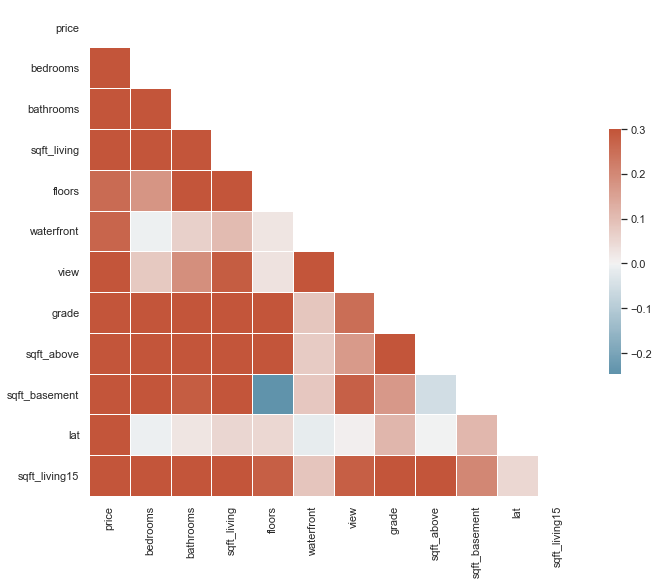

In [106]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


From the above figure, we can see that some features are highly correlated with each other. We will -arbitrarily- search for correlations *above 0.75* and remove the features with the **lowest** correlation with the target variable (price).

In [107]:
correlations = (df.corr()>0.75).sum(axis=0)
correlations

price            1
bedrooms         1
bathrooms        2
sqft_living      5
floors           1
waterfront       1
view             1
grade            3
sqft_above       3
sqft_basement    1
lat              1
sqft_living15    2
dtype: int64

Once more, this is contestable and the result of my own interpretation, but I am of the opinion that although there are sets of variables which are indeed highly correlated, they ultimately represent two independent variables and should be kept as they are. I believe this to be the case with the following sets of variables:
- ("bathrooms", "sqft_living") 
- ("grade", "sqft_living")
- ("grade", sqft_above")

In contrast, I deem that the variable "sqft_living" is not only highly correlated with "sqft_above" (0.877) and "sqft_living15" (0.756), but that it really represents most of the information we need for the linear regression. Indeed, according to the description of the original dataset found on [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction), "sqft_above" is the square footage of the house apart from the basement and "sqft_living15" is the square footage of the living room area in 2015 (which implies renovations). It is also useful to note that the variable "grade" is given by the King County grading system and refers to the types of materials used and the quality of workmanship (more info can be found [here](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g))

Thus, I chose to remove two more features ("sqft_above" and "sqft_living15") and keep "sqft_living" which has the highest correlation with the target variable (0.702).

In [108]:
df.drop(columns=['sqft_above', 'sqft_living15'], inplace=True)
print(len(df.columns))

10


In [111]:
# Update features and store their length
features = df.drop(columns=['price'])
target = df['price']

We are ultimately left with **9 features** that will be used for the linear regression. Let us update the features and store their number.

In [114]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21611 non-null  float64
 1   bathrooms      21611 non-null  float64
 2   sqft_living    21611 non-null  float64
 3   floors         21611 non-null  float64
 4   waterfront     21611 non-null  float64
 5   view           21611 non-null  float64
 6   grade          21611 non-null  float64
 7   sqft_basement  21611 non-null  float64
 8   lat            21611 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


# linear regression**

In this section, we are going to use our implementation of linear regression algorithm.
At the very beggining, we are going to **normalize the features** so as to ensure an efficient convergence of the model.

In [144]:
# Normalize the features
features = ((features - features.mean()) / features.std())
target = ((target - target.mean()) / target.std())

Now we are going to **create the X, y and theta (Θ) matrices**. We could also use for-loops; however, the NumPy library is able to handle numerical computations more efficiently if the operations are vectorized.

In [145]:
# Create X, y and theta
x = features.to_numpy()
y = target.to_numpy().reshape(-1,1)
thetas = np.ones((x.shape[1], 1))

We are also going to store the target variable and check the size of the matrices.

In [146]:
print(x.shape)
print(y.shape)
print(thetas.shape)

(21611, 9)
(21611, 1)
(9, 1)


# here we can load our implementation of L.R. from assig3

In [147]:
class linear_regression:

    def __init__(self):
        self.b = 0
        
    def train(self,x,y):
        self.b = np.linalg.pinv(x).dot(y)
    
    def predict(self,x):
        yhat = x.dot(self.b)
        return yhat
    
    def calc_error(self, y, yhat):
        error = ((yhat-y)**2)
        return error
    def plotting(self, x, y, yhat):
        plt.scatter(x,y, label = 'Original data')
        plt.plot(x, yhat, color='r', label='Prrdicted data')
        plt.xlabel('X_data')
        plt.ylabel('Y_data')
        plt.show()

In [148]:
model = linear_regression()

In [149]:
# Train
model.train(x,y)
print(model.b)

[[-0.06566831]
 [-0.00739712]
 [ 0.49135671]
 [-0.04414894]
 [ 0.14173159]
 [ 0.14061177]
 [ 0.26551086]
 [-0.00186475]
 [ 0.25404958]]


In [150]:
# test
yhat = model.predict(x)

mean: 0.342276122159282
max_error: 160.67202571325743
Min_error: 8.283796636214044e-11


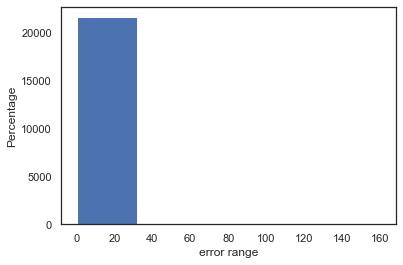

In [151]:
#get error range
error = model.calc_error(y ,yhat)

#Expected value
print(f'mean: {error.mean()}')

#max error
print(f'max_error: {error.max()}')

#min error
print(f'Min_error: {error.min()}')

#plot hist of errors
plt.hist(error, bins = 5)
plt.xlabel('error range')
plt.ylabel('Percentage')
plt.show()